DESCRIPTION:-

Background of Problem Statement :
    
It gave information about different seasonal crops at district level and area of cultivation along with total crop production.India being agriculture rich country, this data will have lots of minor and major facts.Also it provides the information of Climate of India comprises a wide range of weather conditions across a vast geographic scale and varied topograph.


Problem Objective :

The problem aims to give insights into Indian agriculture status: state-wise, district-wise, crop-wise, area-wise,levels of productions and rainfall pattern in different areas . A complete analysis will paint a beautiful story of this important aspect of India.

    
Domain: Agriculture
    

Analysis Tasks to be performed:

Importing necessarylibraries

Importing data set

Pre preprocessing Data

Data Cleaning

Analysis of the data set

Conclusion of the data set

In [1]:
#importing Required library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from numpy import median
import gmaps
%matplotlib inline

In [2]:
# Loading the dataset

df_Cropsproduction=pd.read_csv(r"C:\Users\prash\crop_production.csv")
df_Rainfall=pd.read_csv(r"C:\Users\prash\Data Set - Rainfall.csv")

In [3]:
df_Cropsproduction.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
df_Rainfall.head()

,STATE_UT_NAME,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1997,9.5,0.0,0.2,15.6,281.1,199.5,918.5,430.6,440.2,128.7,292.8,38.4,2755.1,9.5,296.9,1988.8,459.9
1,ANDAMAN & NICOBAR ISLANDS,1998,0.9,0.0,0.0,0.0,348.9,600.0,364.5,258.9,337.8,618.6,227.8,89.0,2846.4,0.9,348.9,1561.2,935.4
2,ANDAMAN & NICOBAR ISLANDS,1999,46.8,44.6,14.2,270.6,257.4,295.0,408.5,329.2,325.3,437.5,124.9,145.7,2699.7,91.4,542.2,1358.0,708.1
3,ANDAMAN & NICOBAR ISLANDS,2000,53.0,59.0,171.3,218.1,422.8,357.0,176.3,460.8,250.1,321.2,158.3,115.2,2763.2,112.0,812.2,1244.2,594.7
4,ANDAMAN & NICOBAR ISLANDS,2001,89.0,15.7,143.3,30.1,705.3,370.7,341.3,469.0,334.4,267.6,222.6,91.8,3080.9,104.7,878.7,1515.4,582.0


In [5]:
df_Cropsproduction.shape

(246091, 7)

Dimensions of the dataset is 246091 rows and 7 columns

In [6]:
df_Rainfall.shape

(684, 19)

Dimensions of the dataset is 684 rows and 19 columns

In [7]:
df_Cropsproduction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


Out of seven variables, it has four categorical variables(State_Name,District_Name, Season and Crop type) and three continuous variables in float(Area and Production) and integer(Crop_Year) format.

In [8]:
df_Rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATE_UT_NAME  684 non-null    object 
 1   YEAR           684 non-null    int64  
 2   JAN            683 non-null    float64
 3   FEB            683 non-null    float64
 4   MAR            684 non-null    float64
 5   APR            684 non-null    float64
 6   MAY            684 non-null    float64
 7   JUN            684 non-null    float64
 8   JUL            683 non-null    float64
 9   AUG            684 non-null    float64
 10  SEP            684 non-null    float64
 11  OCT            684 non-null    float64
 12  NOV            683 non-null    float64
 13  DEC            683 non-null    float64
 14  ANNUAL         681 non-null    float64
 15  Jan-Feb        682 non-null    float64
 16  Mar-May        684 non-null    float64
 17  Jun-Sep        683 non-null    float64
 18  Oct-Dec   

Out of Nineteen variables, it has one categorical variables(STATE_UT_NAME) and seventeen continuous variables in float(Jan to dec ,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec) and integer(Year) format

In [9]:
#Checking for Missing Data

df_Cropsproduction.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [10]:
df_Rainfall.isnull().sum()

STATE_UT_NAME    0
YEAR             0
JAN              1
FEB              1
MAR              0
APR              0
MAY              0
JUN              0
JUL              1
AUG              0
SEP              0
OCT              0
NOV              1
DEC              1
ANNUAL           3
Jan-Feb          2
Mar-May          0
Jun-Sep          1
Oct-Dec          1
dtype: int64

In [11]:
3730/246091

0.015156994770227274

Checking for missing values showed Production variable showing huge number of missing values amounting to 3730 values and no missing values for other variables. Next step would be dropping these samples as this is big dataset. Missing value accounts for only 1.5% of total sample size.

In [12]:
# Dropping missing values

df_Cropsproduction.dropna(subset=["Production"],axis=0,inplace=True)

In [13]:
df_Cropsproduction.shape

(242361, 7)

By dropping missing values in Production variable it ended up with 242361 sample size.

In [14]:
df_Cropsproduction.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

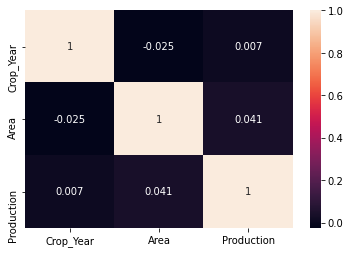

In [15]:
# Heat Map For correlation

plt.tick_params(labelsize=10)
sns.heatmap(df_Cropsproduction.corr(),annot=True);

There is no variable showing high correlation with any other variable in the dataset.

In [16]:
# Reading Columns
df_Cropsproduction.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [17]:
df_Cropsproduction.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [18]:
df_Cropsproduction.State_Name.nunique()

33

In [19]:
df_Cropsproduction.State_Name.value_counts()

Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                          954
P

In [20]:
df_Cropsproduction.State_Name.value_counts()

Uttar Pradesh                  33189
Madhya Pradesh                 22604
Karnataka                      21079
Bihar                          18874
Assam                          14622
Odisha                         13524
Tamil Nadu                     13266
Maharashtra                    12496
Rajasthan                      12066
Chhattisgarh                   10368
West Bengal                     9597
Andhra Pradesh                  9561
Gujarat                         8365
Telangana                       5591
Uttarakhand                     4825
Haryana                         4540
Kerala                          4003
Nagaland                        3904
Punjab                          3143
Meghalaya                       2867
Arunachal Pradesh               2545
Himachal Pradesh                2456
Jammu and Kashmir               1632
Tripura                         1412
Manipur                         1266
Jharkhand                       1266
Mizoram                          954
P

This dataset encodes agriculture data for 33 Indian states (including Union Territory). As seen above, it has more data from top agriculture rich states like Uttar Pradesh, Madhya Pradesh and Karnatake than other states.

In [21]:
#  finding number of states for rainfall
states =df_Rainfall['STATE_UT_NAME'].unique()
states

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'BIHAR', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'COASTAL KARNATAKA',
       'EAST MADHYA PRADESH', 'EAST RAJASTHAN', 'EAST UTTAR PRADESH',
       'GANGETIC WEST BENGAL', 'GUJARAT REGION',
       'HARYANA DELHI & CHANDIGARH', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KERALA', 'KONKAN & GOA',
       'LAKSHADWEEP', 'MADHYA MAHARASHTRA', 'MATATHWADA',
       'NAGA MANI MIZO TRIPURA', 'NORTH INTERIOR KARNATAKA', 'ORISSA',
       'PUNJAB', 'RAYALSEEMA', 'SAURASHTRA & KUTCH',
       'SOUTH INTERIOR KARNATAKA', 'SUB HIMALAYAN WEST BENGAL & SIKKIM',
       'TAMIL NADU', 'TELANGANA', 'UTTARAKHAND', 'VIDARBHA',
       'WEST MADHYA PRADESH', 'WEST RAJASTHAN', 'WEST UTTAR PRADESH'],
      dtype=object)

In [22]:
df_Rainfall.STATE_UT_NAME.nunique()

36

In [23]:
df_Cropsproduction.District_Name.nunique()

646

For 33 Indain states on further dissecting it consists of 646 different districts.

In [24]:
df_Cropsproduction.District_Name.unique()

array(['NICOBARS', 'NORTH AND MIDDLE ANDAMAN', 'SOUTH ANDAMANS',
       'ANANTAPUR', 'CHITTOOR', 'EAST GODAVARI', 'GUNTUR', 'KADAPA',
       'KRISHNA', 'KURNOOL', 'PRAKASAM', 'SPSR NELLORE', 'SRIKAKULAM',
       'VISAKHAPATANAM', 'VIZIANAGARAM', 'WEST GODAVARI', 'ANJAW',
       'CHANGLANG', 'DIBANG VALLEY', 'EAST KAMENG', 'EAST SIANG',
       'KURUNG KUMEY', 'LOHIT', 'LONGDING', 'LOWER DIBANG VALLEY',
       'LOWER SUBANSIRI', 'NAMSAI', 'PAPUM PARE', 'TAWANG', 'TIRAP',
       'UPPER SIANG', 'UPPER SUBANSIRI', 'WEST KAMENG', 'WEST SIANG',
       'BAKSA', 'BARPETA', 'BONGAIGAON', 'CACHAR', 'CHIRANG', 'DARRANG',
       'DHEMAJI', 'DHUBRI', 'DIBRUGARH', 'DIMA HASAO', 'GOALPARA',
       'GOLAGHAT', 'HAILAKANDI', 'JORHAT', 'KAMRUP', 'KAMRUP METRO',
       'KARBI ANGLONG', 'KARIMGANJ', 'KOKRAJHAR', 'LAKHIMPUR', 'MARIGAON',
       'NAGAON', 'NALBARI', 'SIVASAGAR', 'SONITPUR', 'TINSUKIA',
       'UDALGURI', 'ARARIA', 'ARWAL', 'AURANGABAD', 'BANKA', 'BEGUSARAI',
       'BHAGALPUR', 'BHOJPUR', 'B

In [25]:
# Production of crops as per district names

df_Cropsproduction.District_Name.value_counts()

TUMKUR       931
BELGAUM      924
BIJAPUR      905
HASSAN       895
BELLARY      887
            ... 
HYDERABAD      8
RAMGARH        6
KHUNTI         6
MUMBAI         1
NAMSAI         1
Name: District_Name, Length: 646, dtype: int64

As per district names majority are from Tumkur, Belgaum, Hassan, Bellary and Bijapur from Karantaka state.

In [26]:
# Production of crops as per Year

print(df_Cropsproduction.Crop_Year.nunique())
print(df_Cropsproduction.Crop_Year.min())
print(df_Cropsproduction.Crop_Year.max())
print(df_Cropsproduction.Crop_Year.value_counts())

19
1997
2015
2003    17139
2002    16536
2007    14269
2008    14230
2006    13976
2004    13858
2010    13793
2011    13791
2009    13767
2000    13553
2005    13519
2013    13475
2001    13293
2012    13184
1999    12441
1998    11262
2014    10815
1997     8899
2015      561
Name: Crop_Year, dtype: int64


Dataset has data for 19 years from 1997 to 2015. Top years are 2003, 2002, 2007-08 and 2006

In [27]:
# Crop production as per Season

print(df_Cropsproduction.Season.nunique())
print(df_Cropsproduction.Season.unique())
print(df_Cropsproduction.Season.max())
print(df_Cropsproduction.Season.value_counts())

6
['Kharif     ' 'Whole Year ' 'Autumn     ' 'Rabi       ' 'Summer     '
 'Winter     ']
Winter     
Kharif         94283
Rabi           66160
Whole Year     56127
Summer         14811
Winter          6050
Autumn          4930
Name: Season, dtype: int64


Dataset has maximum crop production from kharif season.

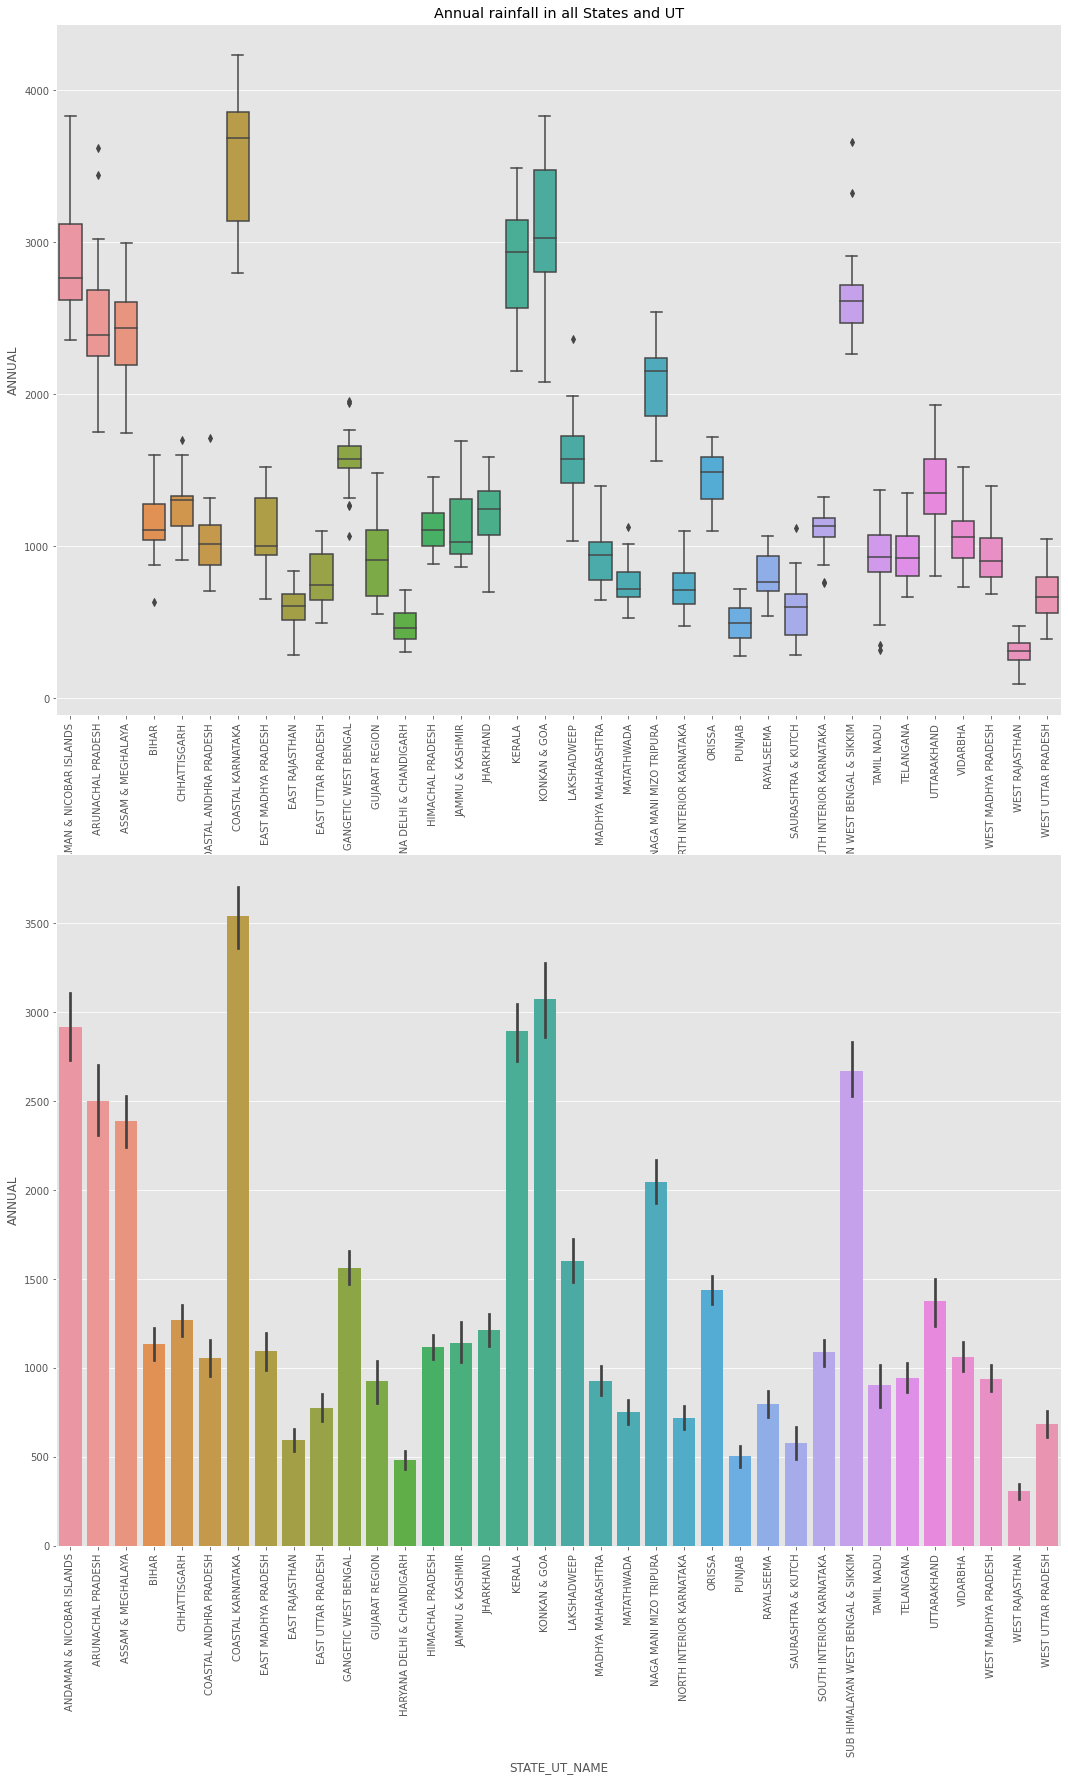

In [28]:
# Annual Rainfall in all states and union territory

plt.style.use('ggplot')

fig = plt.figure(figsize=(18, 28))
ax = plt.subplot(2,1,1)
ax = plt.xticks(rotation=90)
ax = sns.boxplot(x='STATE_UT_NAME', y='ANNUAL', data=df_Rainfall)
ax = plt.title('Annual rainfall in all States and UT')

ax = plt.subplot(2,1,2)
ax = plt.xticks(rotation=90)
ax = sns.barplot(x='STATE_UT_NAME', y='ANNUAL', data=df_Rainfall)

Coastal Karnataka has highest annual rainfall and Western Rajasthan has lowest annual Rainfall 

In [29]:
# Average Rainfall Month wise for various states

total_rainfall_in_states = df_Rainfall.groupby(['STATE_UT_NAME']).sum()
total_rainfall_in_states['STATE_UT_NAME'] = total_rainfall_in_states.index
total_rainfall_in_states

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,STATE_UT_NAME
STATE_UT_NAME,,,,,,,,,,,,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,38114,1087.5,445.3,1110.9,1692.9,7297.5,7882.6,8067.7,7409.2,8276.6,5805.9,4076.0,2217.1,55369.8,1533.1,10101.2,31636.3,12099.0,ANDAMAN & NICOBAR ISLANDS
ARUNACHAL PRADESH,38114,632.3,1218.0,2453.7,4218.9,4683.1,8589.2,9157.1,7152.5,6253.5,2349.3,566.0,267.5,47541.1,1850.5,11355.6,31152.4,3183.1,ARUNACHAL PRADESH
ASSAM & MEGHALAYA,38114,209.3,438.8,1334.2,3825.8,5597.2,8853.6,9095.9,7456.7,5382.2,2662.3,358.7,126.5,45341.3,648.2,10757.5,30788.1,3147.7,ASSAM & MEGHALAYA
BIHAR,38114,167.2,200.9,144.7,371.4,1261.7,3279.1,6176.2,5046.8,3577.9,1166.7,68.6,49.3,21510.5,368.1,1778.3,18079.7,1284.6,BIHAR
CHHATTISGARH,38114,291.5,166.1,187.4,307.9,274.1,3480.5,7060.1,6621.8,4164.7,1150.0,231.6,127.2,24061.9,457.6,769.1,21327.0,1508.2,CHHATTISGARH
COASTAL ANDHRA PRADESH,38114,171.3,247.3,295.4,591.0,1018.4,2523.3,3245.6,3624.1,3615.2,3111.3,1293.3,325.1,20060.6,418.4,1904.9,13007.6,4729.3,COASTAL ANDHRA PRADESH
COASTAL KARNATAKA,38114,41.8,67.6,305.6,748.3,2519.1,15702.0,20575.0,14740.9,6680.4,3961.6,1261.1,206.2,63691.3,98.1,3572.7,57698.4,5429.0,COASTAL KARNATAKA
EAST MADHYA PRADESH,38114,232.6,276.4,233.9,113.6,131.9,2786.0,6435.5,5865.5,3554.0,745.9,256.6,155.8,20787.7,508.8,479.2,18641.2,1158.4,EAST MADHYA PRADESH
EAST RAJASTHAN,38114,59.2,106.0,101.3,74.2,167.4,1254.9,3793.8,3775.4,1631.8,192.4,76.5,40.3,11273.3,165.0,342.8,10455.7,309.3,EAST RAJASTHAN


In [30]:
print(df_Cropsproduction.Crop.nunique())
print(df_Cropsproduction.Crop.unique())
print(df_Cropsproduction.Crop.max())
print(df_Cropsproduction.Crop.value_counts().head(20))

124
['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Coconut '
 'Dry ginger' 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper'
 'Dry chillies' 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)'
 'Urad' 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed'
 'Cotton(lint)' 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram'
 'Wheat' 'Masoor' 'Sesamum' 'Linseed' 'Safflower' 'Onion'
 'other misc. pulses' 'Samai' 'Small millets' 'Coriander' 'Potato'
 'Other  Rabi pulses' 'Soyabean' 'Beans & Mutter(Vegetable)' 'Bhindi'
 'Brinjal' 'Citrus Fruit' 'Cucumber' 'Grapes' 'Mango' 'Orange'
 'other fibres' 'Other Fresh Fruits' 'Other Vegetables' 'Papaya'
 'Pome Fruit' 'Tomato' 'Mesta' 'Cowpea(Lobia)' 'Lemon' 'Pome Granet'
 'Sapota' 'Cabbage' 'Rapeseed &Mustard' 'Peas  (vegetable)' 'Niger seed'
 'Bottle Gourd' 'Varagu' 'Garlic' 'Ginger' 'Oilseeds total' 'Pulses total'
 'Jute' 'Peas & beans (Pulses)' 'Blackgram' 'Paddy' 'Pineapple' 'Barley'
 'Sannhamp' 'Khesari' 'Guar seed' 'Mo

The data set has Rice as highest production  as compared to other crops whereas Cotton has the lowest production.

In [31]:
df_Cropsproduction.Production.describe()

count    2.423610e+05
mean     5.825034e+05
std      1.706581e+07
min      0.000000e+00
25%      8.800000e+01
50%      7.290000e+02
75%      7.023000e+03
max      1.250800e+09
Name: Production, dtype: float64

In [32]:
Prod = df_Cropsproduction.groupby(by = df_Cropsproduction.State_Name)['Production','State_Name'].sum().reset_index().sort_values(by = 'Production', ascending = False).head(10)
Prod

<ipython-input-32-db415c814d57>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Prod = df_Cropsproduction.groupby(by = df_Cropsproduction.State_Name)['Production','State_Name'].sum().reset_index().sort_values(by = 'Production', ascending = False).head(10)


,State_Name,Production
15,Kerala,9.788005e+10
1,Andhra Pradesh,1.732459e+10
27,Tamil Nadu,1.207644e+10
30,Uttar Pradesh,3.234493e+09
3,Assam,2.111752e+09
32,West Bengal,1.397904e+09
17,Maharashtra,1.263641e+09
14,Karnataka,8.634298e+08
0,Andaman and Nicobar Islands,7.182232e+08
24,Punjab,5.863850e+08


Kerala is top state when we look at the quantum of Production for last 19 years.

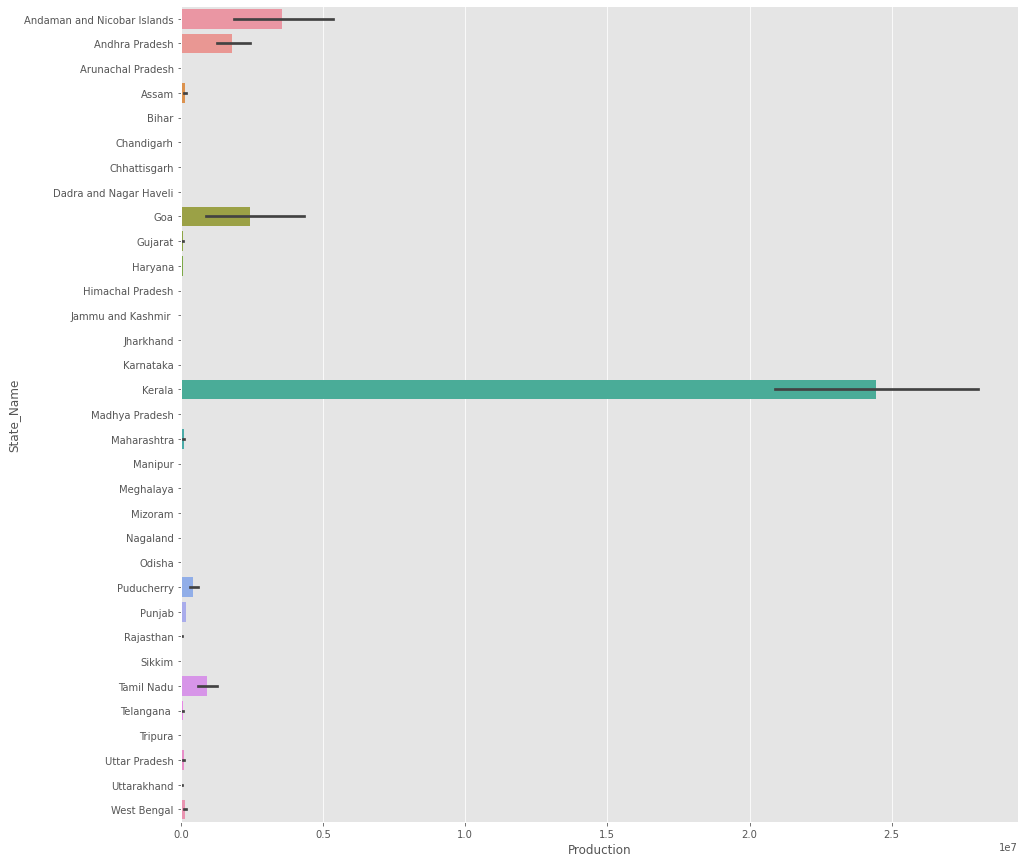

In [33]:
# Production v/s State_Name plotting

plt.figure(figsize= (15,15))
sns.barplot(x=df_Cropsproduction['Production'],y= df_Cropsproduction["State_Name"], orient='h');

New Variables-

Some of the possibilities to extract more information and new variable from existing variables are:

Different zones (Union Terr, South Zone, NE Zone, East Zone, North Zone, Central Zone and West Zone)
Different caterories (Cereal, Pulses,Fruits,Beans,Vegetables, Spices, fibres, Nuts, Natural Polymer,Coffee, Tea, Total foodgrain, Pulses, Oilseeds, Paddy, Commercial, Sugarcane, forage plants and Others)

In [34]:
#Zone-Wise Crop Production

north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [35]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

df_Cropsproduction['Zones'] = df_Cropsproduction.apply(get_zonal_names, axis=1)
df_Cropsproduction['Zones'].unique()

array(['Union Terr', 'South Zone', 'NE Zone', 'East Zone', 'North Zone',
       'Central Zone', 'West Zone'], dtype=object)

df_Cropsproduction.strip() helps to Remove spaces at the beginning and at the end of the string.

In [36]:
df_Cropsproduction.Zones.value_counts()

South Zone      53500
North Zone      49874
East Zone       43261
West Zone       33134
Central Zone    32972
NE Zone         28284
Union Terr       1336
Name: Zones, dtype: int64

Using Zonal information,  the top zones are South India, North India and East India.

In [37]:
crop=df_Cropsproduction['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop==i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop==i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop==i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop==i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop==i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop==i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop==i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop==i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop==i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop==i:
            return 'Commercial'

df_Cropsproduction['cat_crop']=df_Cropsproduction['Crop'].apply(cat_crop)

In [38]:
df_Cropsproduction["cat_crop"].value_counts()

Cereal        63283
Pulses        40898
oilseeds      33801
Vegetables    23154
spices        21638
Nuts          11472
Commercial    10561
fibres         9785
Beans          9115
Fruits         6153
Name: cat_crop, dtype: int64

Looking at the new variable for cat_crop, top frequency of crop types are Cereal, Pulses and oilseeds.

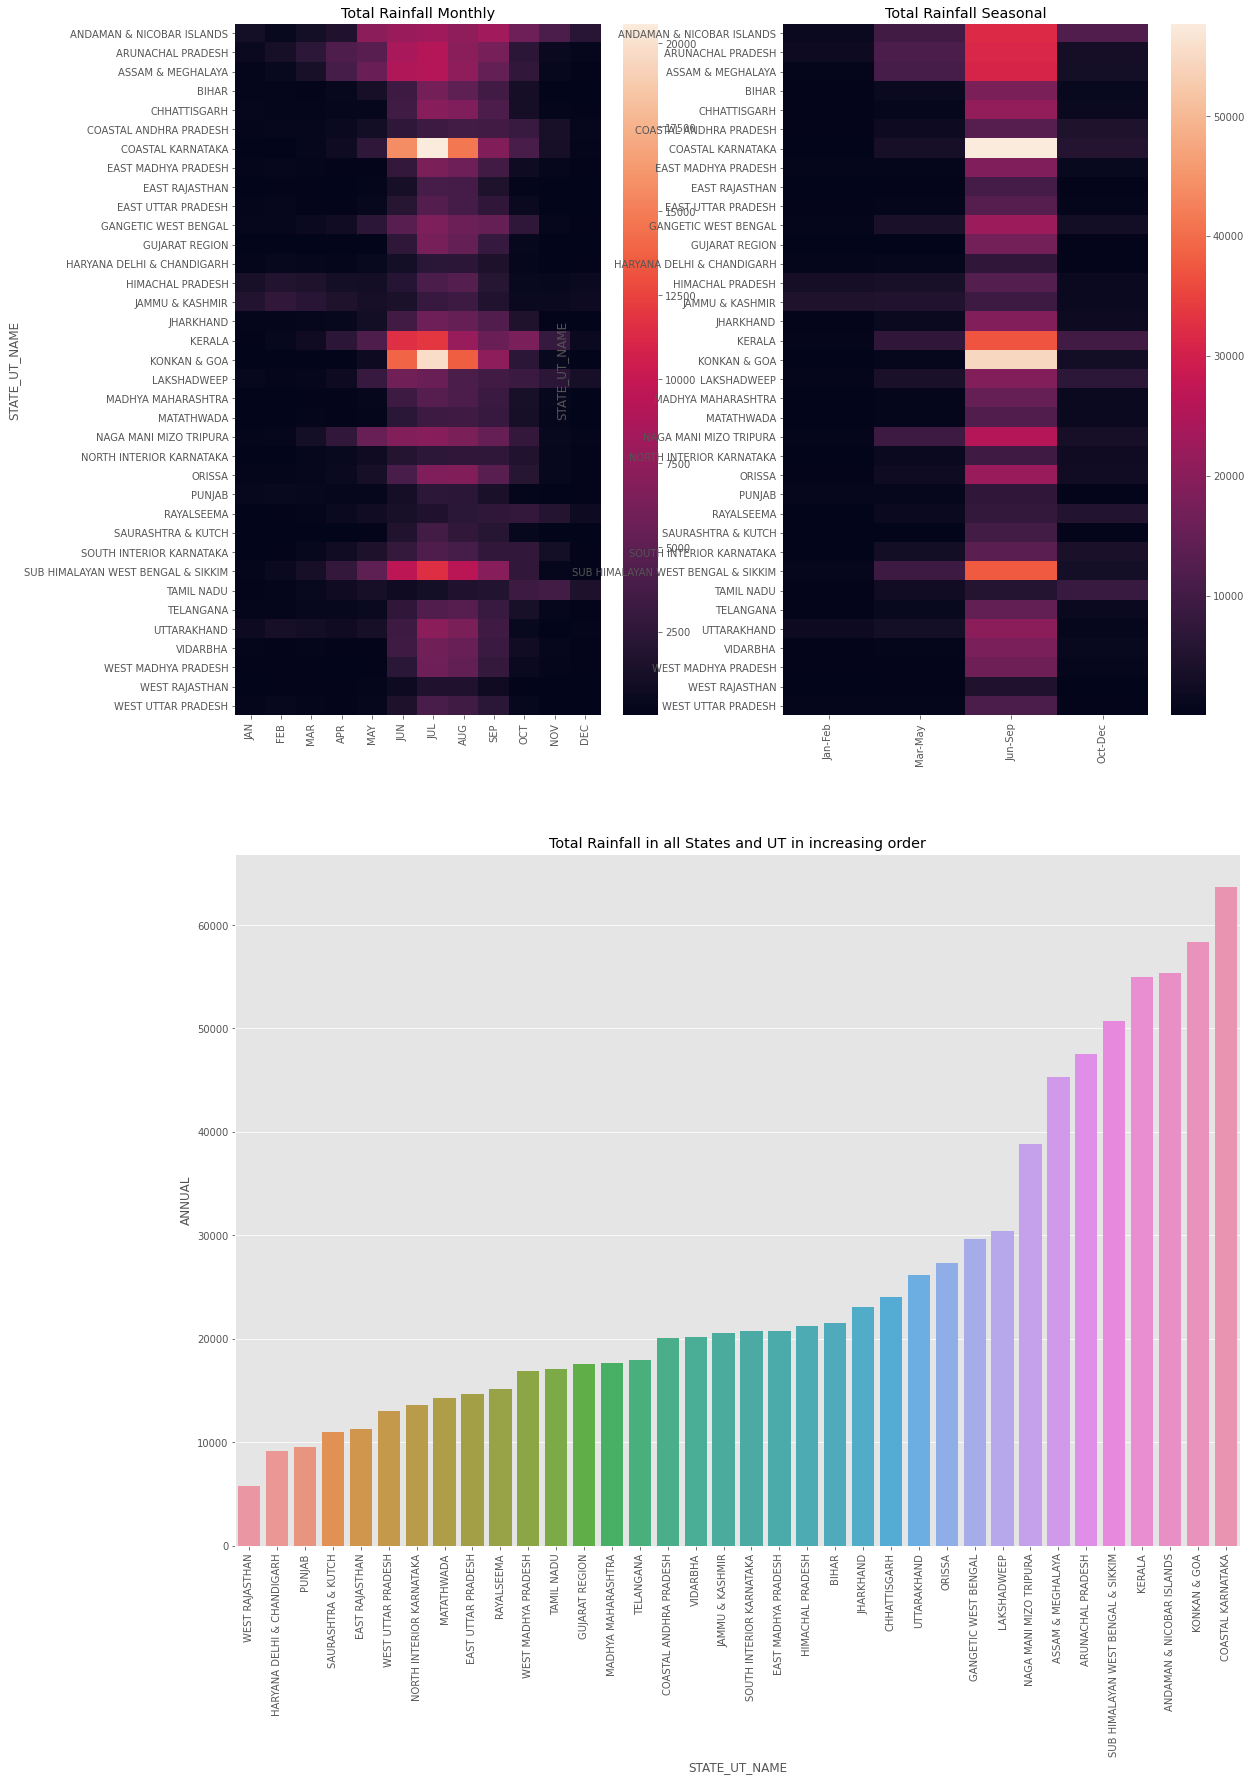

In [39]:
plt.style.use('ggplot')
index = total_rainfall_in_states.index
fig = plt.figure(figsize=(18, 28))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=90)
ax1 = sns.heatmap(total_rainfall_in_states[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']])
ax1 = plt.title('Total Rainfall Monthly')

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=90)
ax2 = sns.heatmap(total_rainfall_in_states[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']])
ax2 = plt.title('Total Rainfall Seasonal')

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=90)
ax3 = sns.barplot(x='STATE_UT_NAME', y='ANNUAL', data=total_rainfall_in_states.sort_values('ANNUAL'))
ax3 = plt.title('Total Rainfall in all States and UT in increasing order')

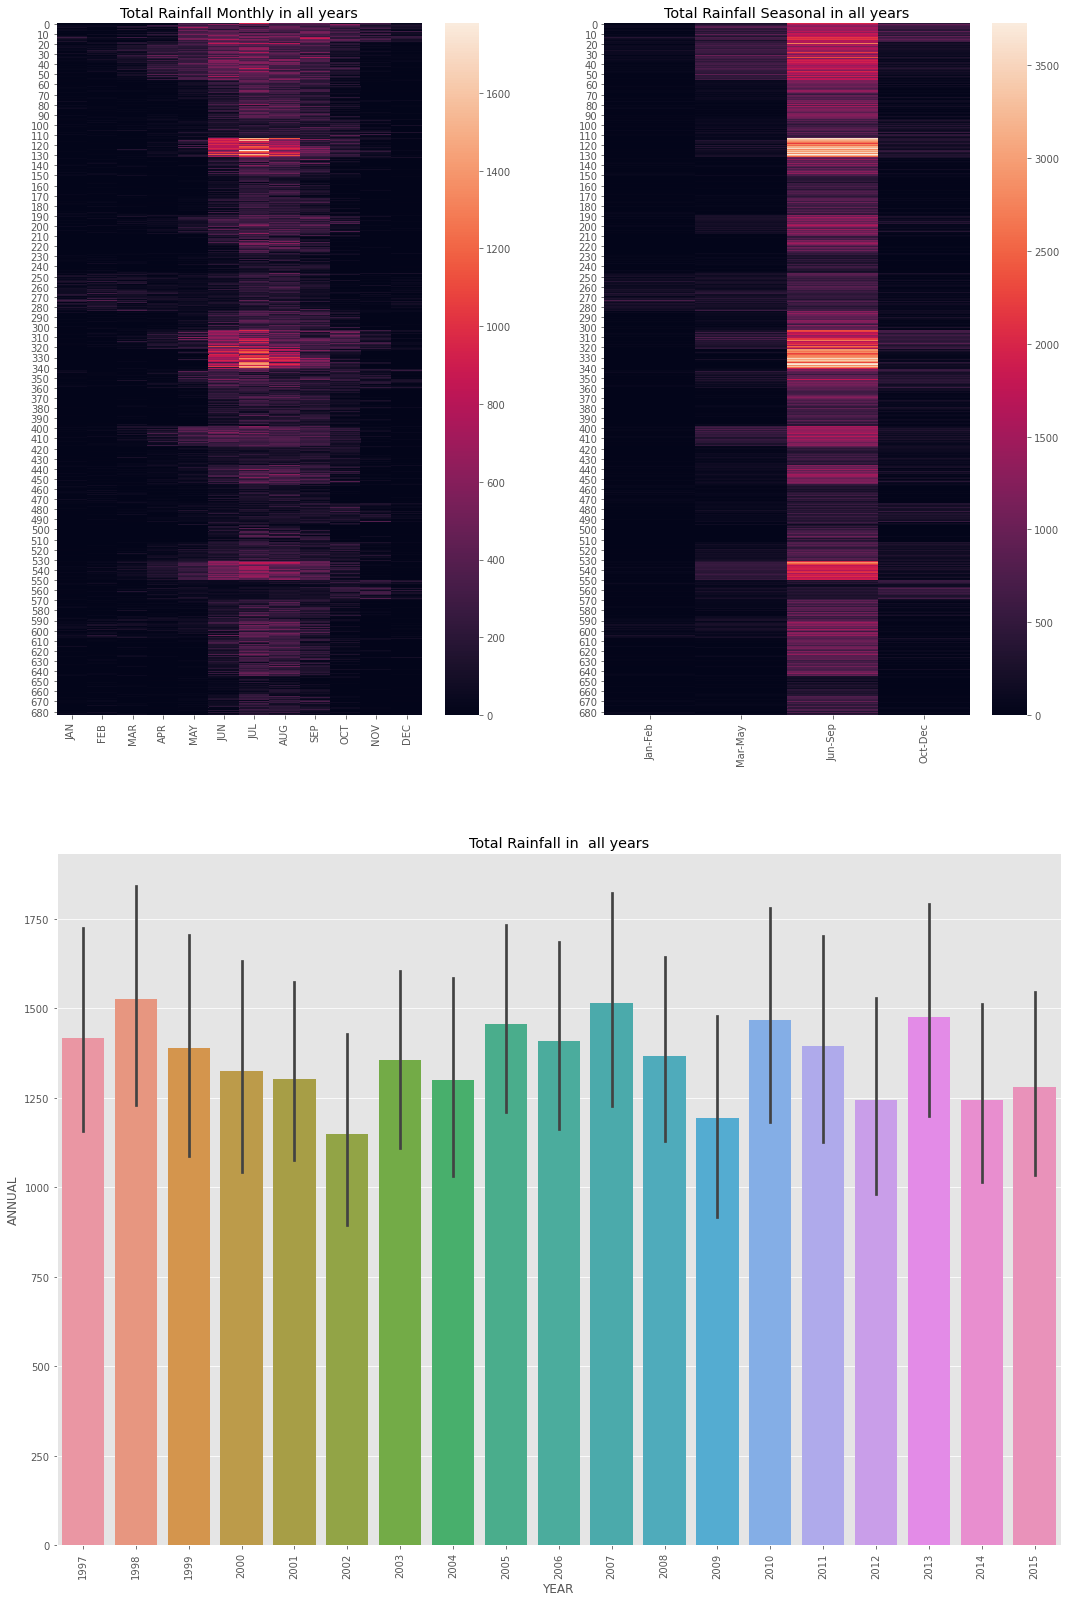

In [40]:
fig = plt.figure(figsize=(18, 28))
ax1 = plt.subplot2grid((2, 2), (0, 0))
ax1 = plt.xticks(rotation=90)
ax1 = sns.heatmap(df_Rainfall[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']])
ax1 = plt.title('Total Rainfall Monthly in all years')

ax2 = plt.subplot2grid((2, 2), (0, 1))
ax2 = plt.xticks(rotation=90)
ax2 = sns.heatmap(df_Rainfall[['Jan-Feb','Mar-May','Jun-Sep','Oct-Dec']])
ax2 = plt.title('Total Rainfall Seasonal in all years')

ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)
ax3 = plt.xticks(rotation=90)
ax3 = sns.barplot(x='YEAR', y='ANNUAL', data=df_Rainfall)
ax3 = plt.title('Total Rainfall in  all years')

In [41]:
total_rainfall_in_states = total_rainfall_in_states.drop('STATE_UT_NAME', axis=1)
total_rainfall_in_states = total_rainfall_in_states.T
total_rainfall_in_states

STATE_UT_NAME,ANDAMAN & NICOBAR ISLANDS,ARUNACHAL PRADESH,ASSAM & MEGHALAYA,BIHAR,CHHATTISGARH,COASTAL ANDHRA PRADESH,COASTAL KARNATAKA,EAST MADHYA PRADESH,EAST RAJASTHAN,EAST UTTAR PRADESH,...,SAURASHTRA & KUTCH,SOUTH INTERIOR KARNATAKA,SUB HIMALAYAN WEST BENGAL & SIKKIM,TAMIL NADU,TELANGANA,UTTARAKHAND,VIDARBHA,WEST MADHYA PRADESH,WEST RAJASTHAN,WEST UTTAR PRADESH
YEAR,38114.0,38114.0,38114.0,38114.0,38114.0,38114.0,38114.0,38114.0,38114.0,38114.0,...,38114.0,38114.0,38114.0,38114.0,38114.0,38114.0,38114.0,38114.0,38114.0,38114.0
JAN,1087.5,632.3,209.3,167.2,291.5,171.3,41.8,232.6,59.2,203.7,...,5.4,43.7,233.7,165.9,170.8,716.7,177.5,124.1,32.8,227.0
FEB,445.3,1218.0,438.8,200.9,166.1,247.3,67.6,276.4,106.0,254.8,...,14.5,107.1,532.0,241.0,169.7,1213.9,115.4,166.0,127.9,333.0
MAR,1110.9,2453.7,1334.2,144.7,187.4,295.4,305.6,233.9,101.3,141.3,...,7.3,327.6,1233.1,414.1,375.2,1013.3,246.1,141.7,107.4,214.5
APR,1692.9,4218.9,3825.8,371.4,307.9,591.0,748.3,113.6,74.2,109.6,...,12.5,958.8,2796.4,879.2,390.1,833.9,122.8,49.2,115.5,122.0
MAY,7297.5,4683.1,5597.2,1261.7,274.1,1018.4,2519.1,131.9,167.4,351.6,...,155.9,1601.7,5026.6,1212.6,495.5,1238.6,165.9,122.8,227.9,293.8
JUN,7882.6,8589.2,8853.6,3279.1,3480.5,2523.3,15702.0,2786.0,1254.9,2144.1,...,1790.1,2885.6,9645.2,864.3,2627.1,3251.3,3442.9,2264.8,676.5,1597.4
JUL,8067.7,9157.1,9095.9,6176.2,7060.1,3245.6,20575.0,6435.5,3793.8,4477.1,...,3690.8,4263.9,11564.6,1100.7,4265.6,7185.6,5895.1,5818.5,1737.2,4021.2
AUG,7409.2,7152.5,7456.7,5046.8,6621.8,3624.1,14740.9,5865.5,3775.4,3736.7,...,2720.6,3843.7,9477.7,1766.2,4615.1,6437.4,5488.7,5161.6,1734.2,3471.8
SEP,8276.6,6253.5,5382.2,3577.9,4164.7,3615.2,6680.4,3554.0,1631.8,2605.9,...,2118.9,2735.6,7033.9,1892.3,3123.8,3446.4,3203.4,2838.6,809.0,2272.6


C:\Users\prash\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Zone-Wise Production: Total')

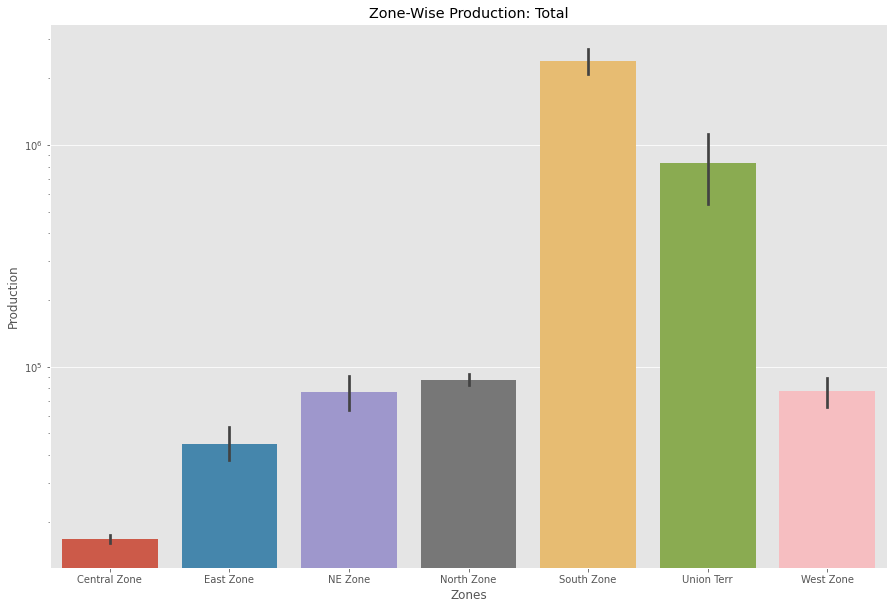

In [42]:
# Zonal distribution of crops:

data_explore = df_Cropsproduction.copy()
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data_explore.Zones.sort_values(ascending=True), data_explore.Production)
plt.yscale('log')
plt.title('Zone-Wise Production: Total')

Production wise top zone is South India

C:\Users\prash\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Southern-Zone Production')

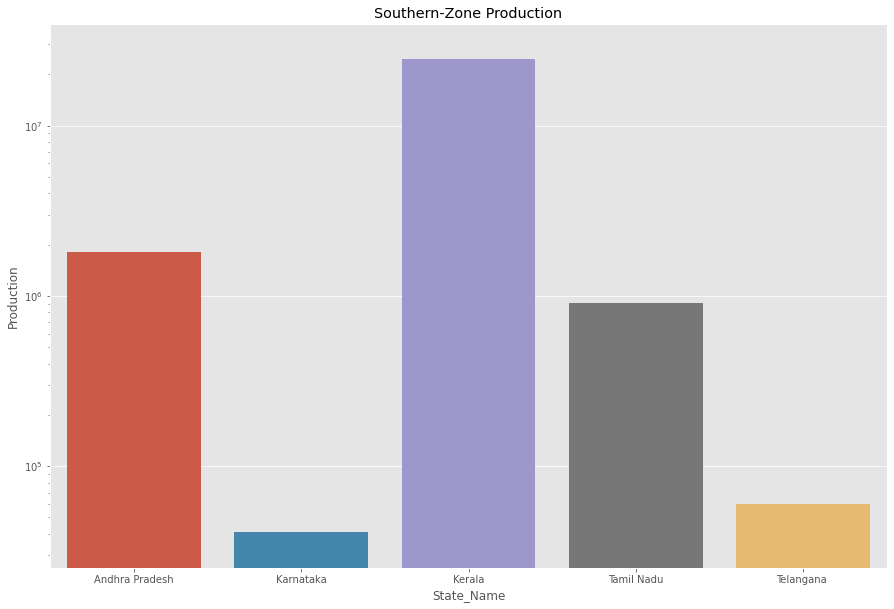

In [43]:
# south zone distribution of crops

south_zone =  data_explore[(data_explore["Zones"] == 'South Zone')]
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(south_zone.State_Name, south_zone.Production,errwidth=0)
plt.yscale('log')
plt.title('Southern-Zone Production')

Top South Indian states are Kerala, Andhra Pradesh and Tamil Nadu.

C:\Users\prash\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Overall Crops vs Production')

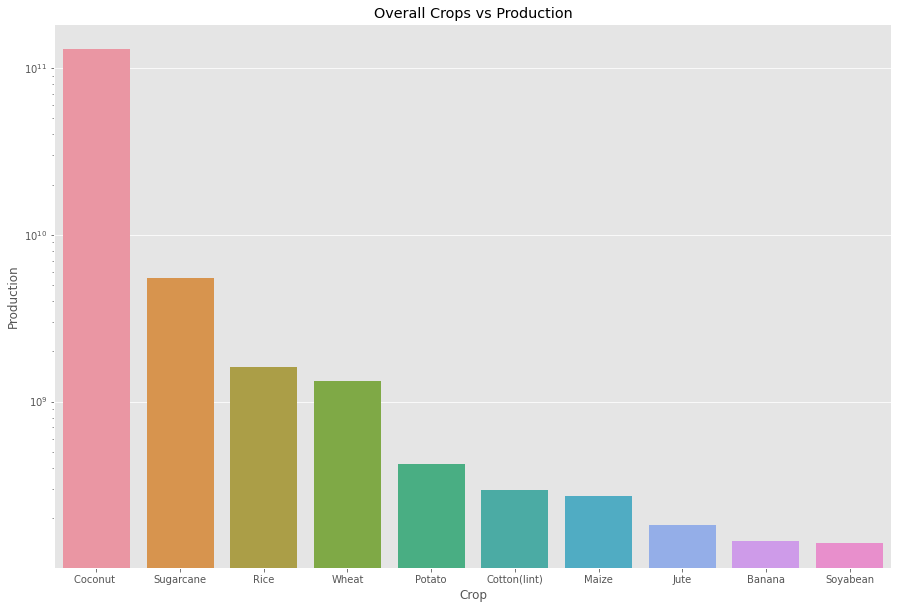

In [44]:
# Crop wise Production status

# Overall Crop Production
crop = data_explore.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
crop 
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(crop.Crop, crop.Production)
plt.yscale('log')
plt.title('Overall Crops vs Production')

Overall production of coconut is much higher than other crops.

<AxesSubplot:xlabel='Crop_Year'>

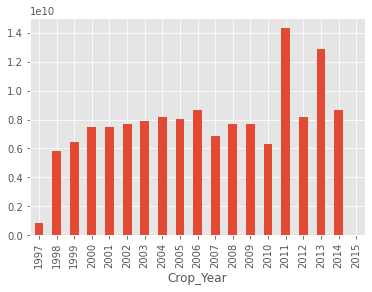

In [45]:
# Yearwise Production Status:

plt.tick_params(labelsize=10)
data_explore.groupby("Crop_Year")["Production"].agg("sum").plot.bar()

Top production years are 2011, 2013 and 2014.

C:\Users\prash\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Seasonal Crops vs Production')

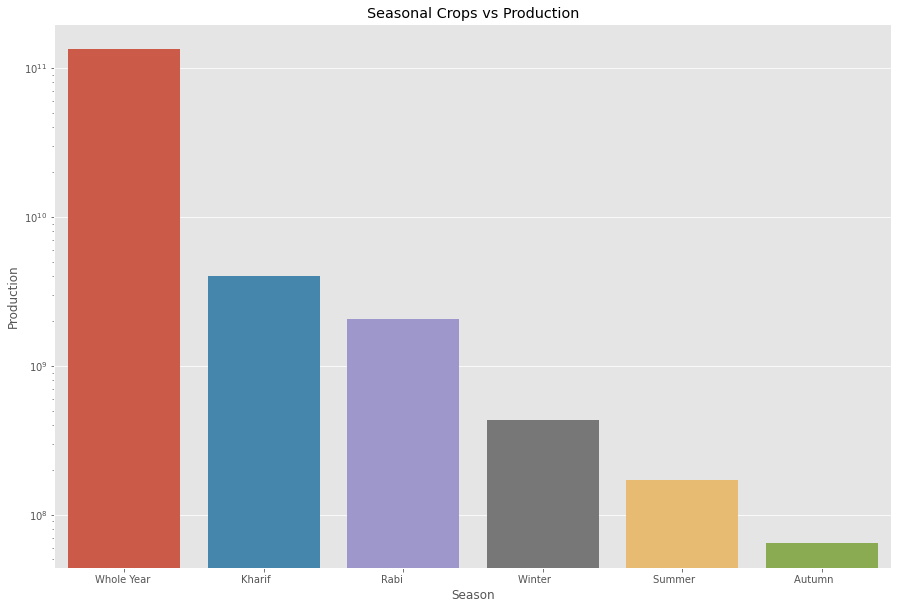

In [46]:
# Season wise Production Status:

df_season=data_explore.copy()
season = df_season.groupby(by='Season')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)
season
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(season.Season, season.Production,errwidth=0)
plt.yscale('log')
plt.title('Seasonal Crops vs Production')

Top crop categories which shows high production values are Whole Year(Annual growing plants),Kharif and Rabi crops. It clearly shows these crops heavily dependent on seasonal monsoon.

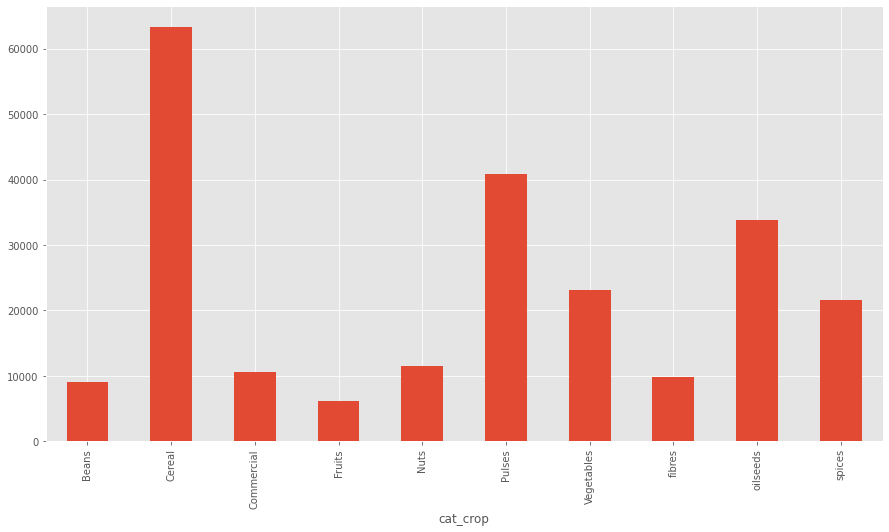

In [47]:
# Crop wise Production plot describing production values for all crop types

plt.figure(figsize=(15,8))
plt.tick_params(labelsize=10)
data_explore.groupby("cat_crop")["Production"].agg("count").plot.bar()
plt.show()

Top crop categories are Cereal, Pulses and Oilseeds.

C:\Users\prash\anaconda3\envs\py38\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


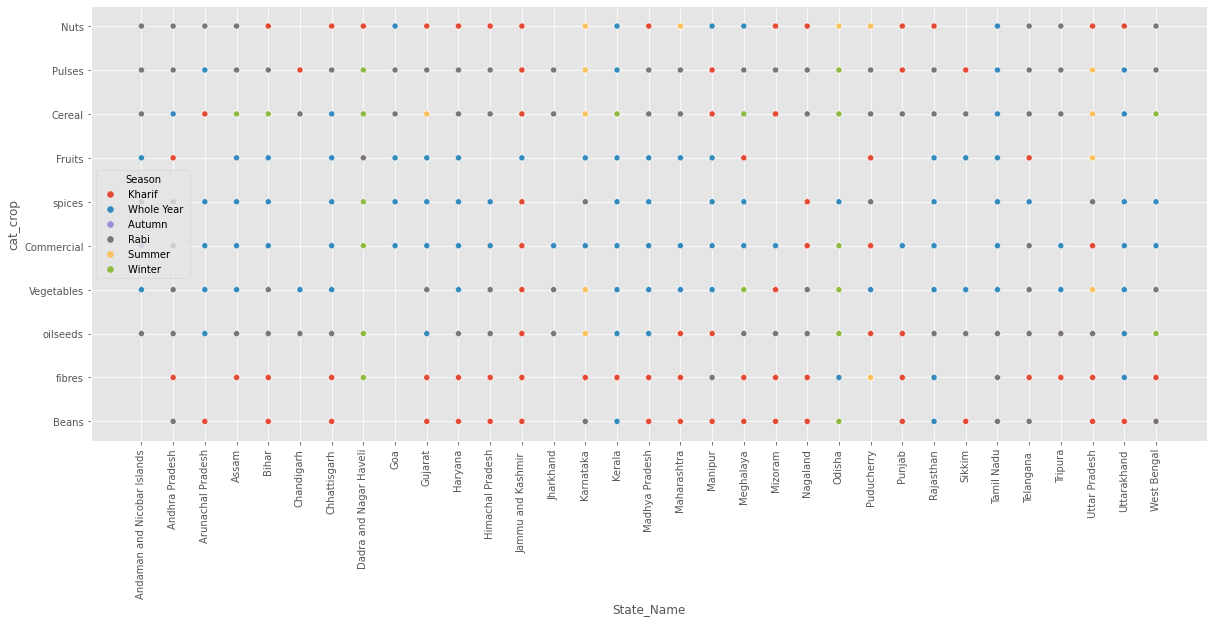

In [48]:
# State versus Crop Category versus Season plot

plt.figure(figsize=(20,8))
sns.scatterplot(data=data_explore,x="State_Name",y="cat_crop",hue="Season")
plt.xticks(rotation=90)
plt.show()

South zone: i. Top producing state Kerala shows a abundance of whole year seasonal crops
North Zone: ii. Top producing state Uttar Pradesh shows abundance of Kharif, Rabi and Summar crops

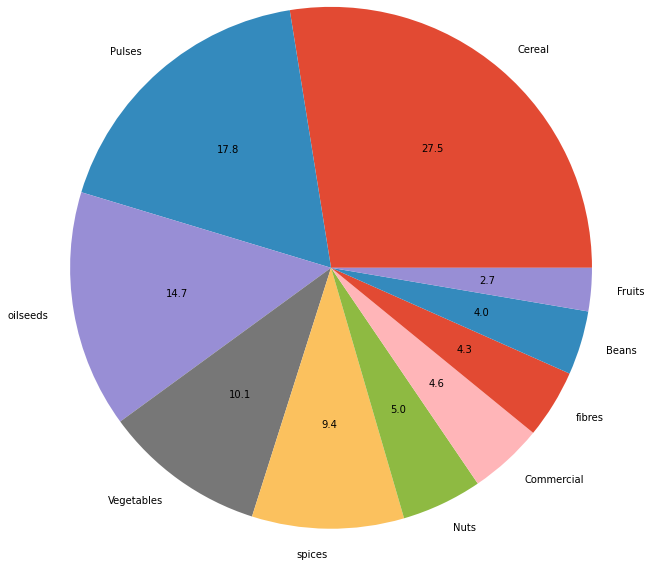

In [49]:
# Different proportion of Crop Categories for India:

df1=data_explore["cat_crop"].value_counts()
df1.plot(radius=3,kind="pie",autopct="%1.1f",pctdistance=0.6)
plt.tick_params(labelsize=10)

In [50]:
# State which dominates in crop production with different categories of crops

df_2 = pd.crosstab(data_explore['State_Name'], data_explore['cat_crop'])
df_2

cat_crop,Beans,Cereal,Commercial,Fruits,Nuts,Pulses,Vegetables,fibres,oilseeds,spices
State_Name,,,,,,,,,,
Andaman and Nicobar Islands,0,20,15,16,37,9,20,0,11,52
Andhra Pradesh,386,2264,474,502,674,1336,1046,333,1101,802
Arunachal Pradesh,26,1021,168,0,26,67,257,0,343,637
Assam,0,2952,854,920,400,2234,1781,1284,2097,1338
Bihar,280,6108,756,226,130,3731,1775,924,2504,1396
Chandigarh,0,39,0,0,0,14,26,0,7,0
Chhattisgarh,646,1805,316,264,261,2087,1143,535,1496,1288
Dadra and Nagar Haveli,0,116,12,9,9,64,0,13,30,1
Goa,0,62,22,16,47,32,0,0,0,12


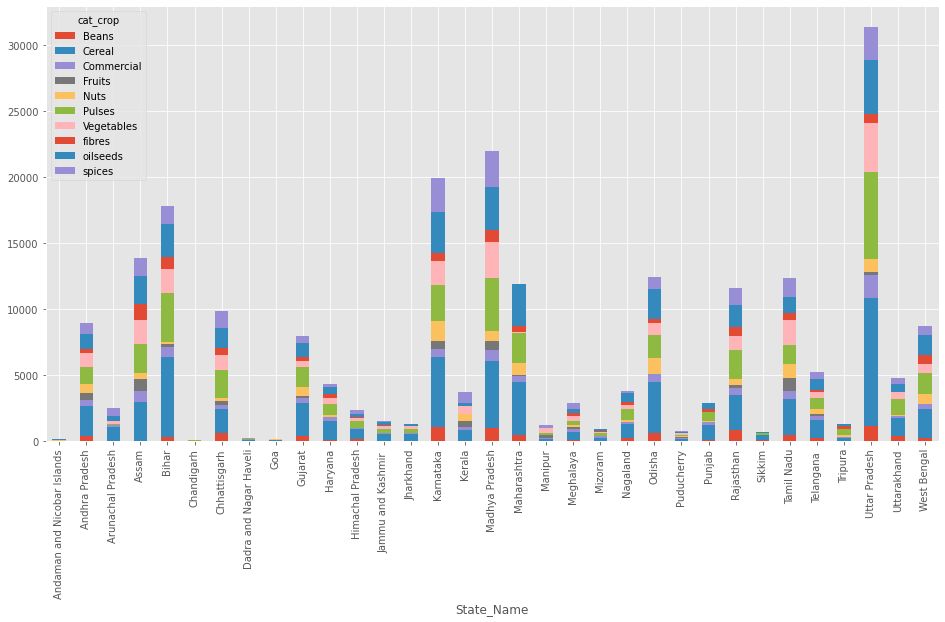

In [51]:
df_2.plot(kind='bar', stacked=True, figsize = (16,8));

Uttar Pradesh is topping in producing more crop categories than any other Indian state.

C:\Users\prash\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,State_Name,Area
30,Uttar Pradesh,4.336223e+08
16,Madhya Pradesh,3.297913e+08
17,Maharashtra,3.221860e+08
25,Rajasthan,2.687882e+08
32,West Bengal,2.154030e+08
14,Karnataka,2.029086e+08
9,Gujarat,1.549261e+08
1,Andhra Pradesh,1.315073e+08
4,Bihar,1.282695e+08
24,Punjab,1.267152e+08


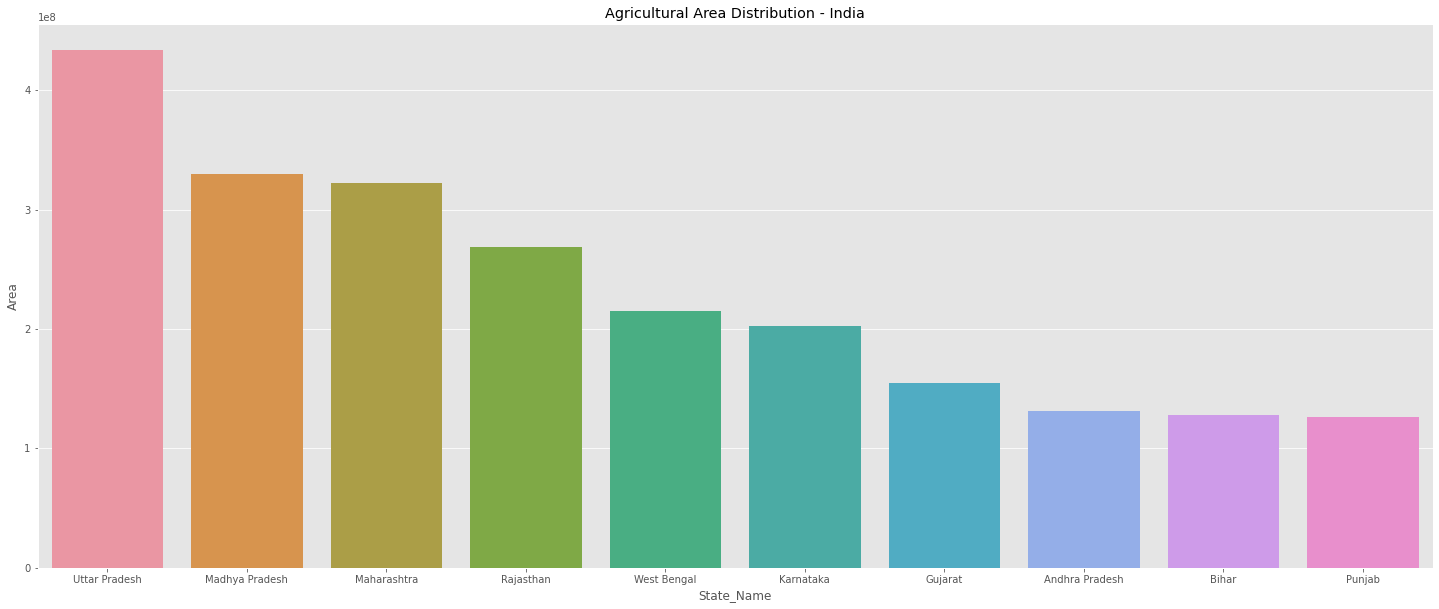

In [52]:
# states ranks as per area wise crop production in India

df = data_explore.groupby(by='State_Name')['Area'].sum().reset_index().sort_values(by='Area', ascending=False)
df.head()

fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(df.State_Name.head(10), df.Area.head(10), errwidth=0)
plt.title('Agricultural Area Distribution - India')
df.head(10)

C:\Users\prash\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,State_Name,Production
5,Uttar Pradesh,3.234493e+09
4,Punjab,5.863850e+08
1,Haryana,3.812739e+08
6,Uttarakhand,1.321774e+08
2,Himachal Pradesh,1.780517e+07
3,Jammu and Kashmir,1.329102e+07
0,Chandigarh,6.395650e+04


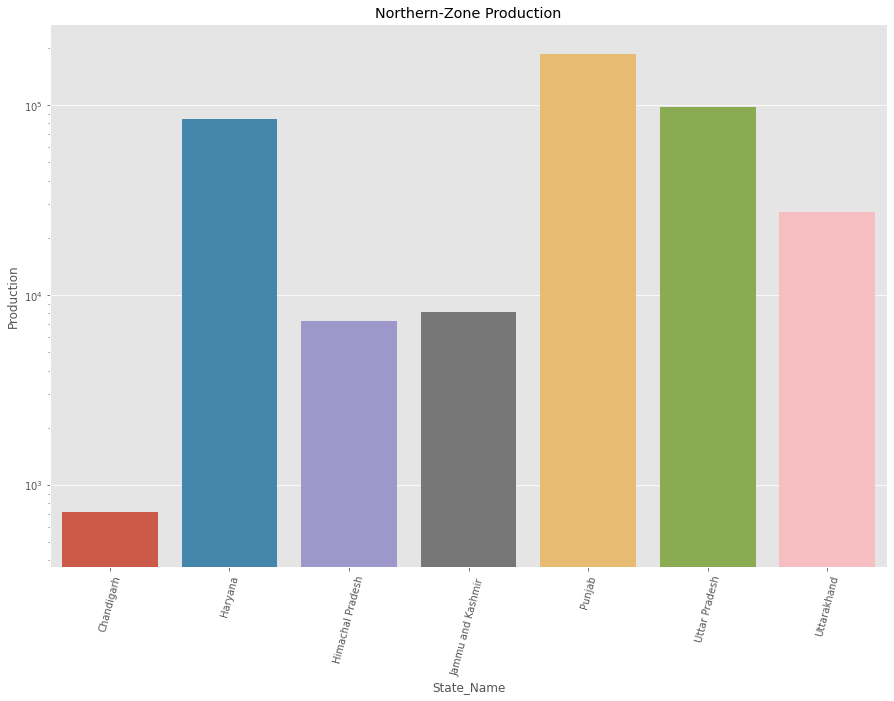

In [53]:
 # top crops grown in Northern parts of India

North_zone =  data_explore[(data_explore["Zones"] == 'North Zone')]
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(North_zone.State_Name, North_zone.Production,errwidth=0)
plt.xticks(rotation=75);
plt.yscale('log')
plt.title('Northern-Zone Production')

North_zone.groupby(by='State_Name')['Production'].sum().reset_index().sort_values(by='Production', ascending=False)

C:\Users\prash\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'North Zone Crops vs Production')

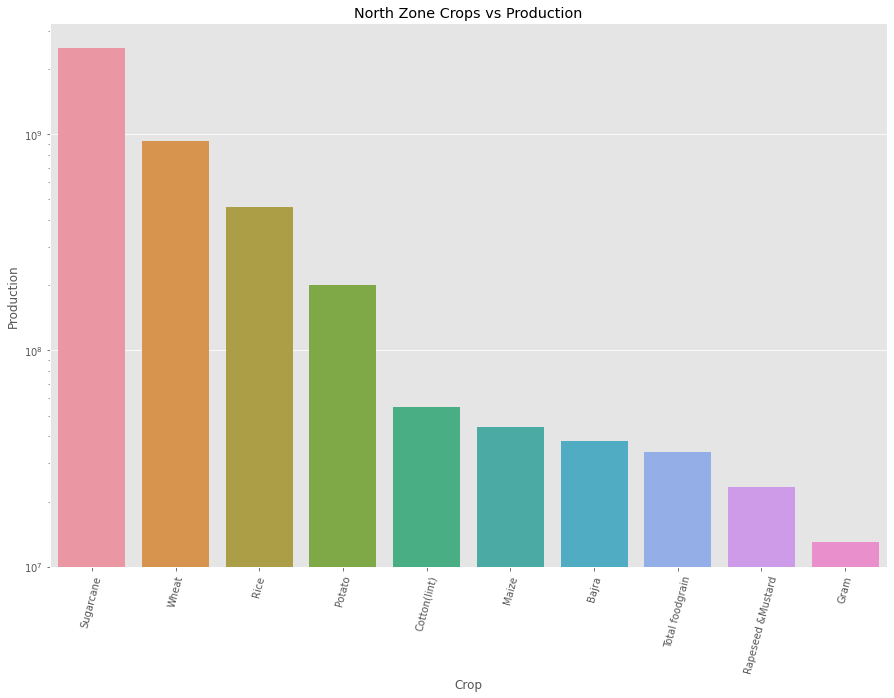

In [54]:
df3 = North_zone.groupby(by='Crop')['Production'].sum().reset_index().sort_values(by='Production', ascending=False).head(10)

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(df3.Crop, df3.Production,errwidth=0)
plt.xticks(rotation=75);
plt.yscale('log')
plt.title('North Zone Crops vs Production')

Production wise top states of North zone are:
Punjab ,Uttar Pradesh and Haryana
Top crops of these states are: Sugarcane,Wheat and Rice.

In [55]:
# Top crop of South India is Coconut,  status of Coconut production in India

coc_df = data_explore[data_explore["Crop"]=="Coconut "]
print(coc_df.shape)
coc_df[:3]

(1958, 9)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,Union Terr,None
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.0,64430000.0,Union Terr,None
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.0,67490000.0,Union Terr,None


C:\Users\prash\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Season', ylabel='Production'>

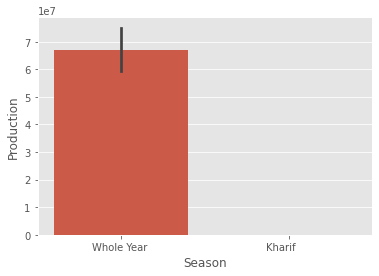

In [56]:
sns.barplot("Season","Production",data=coc_df)

C:\Users\prash\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


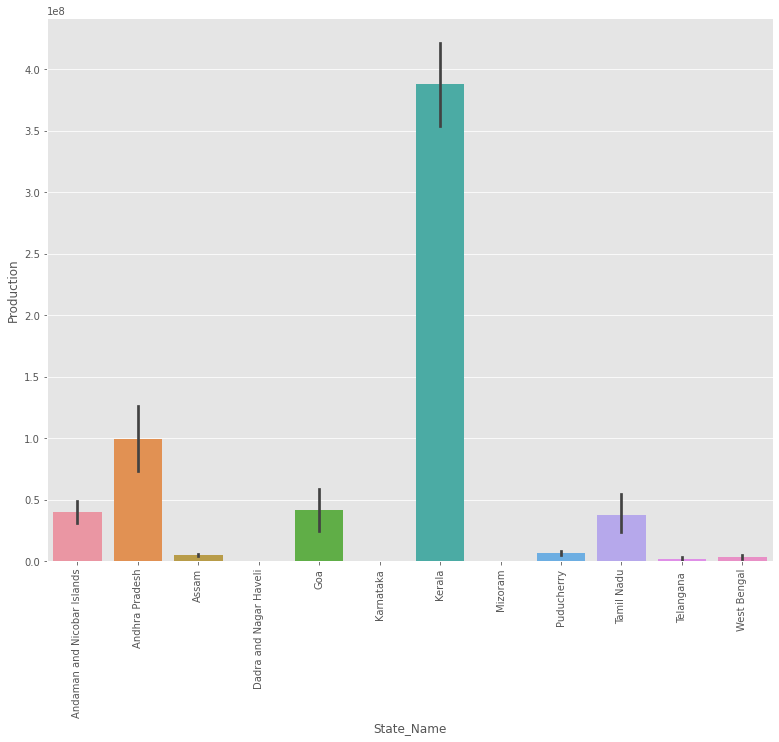

In [57]:
plt.figure(figsize=(13,10))
sns.barplot("State_Name","Production",data=coc_df)
plt.xticks(rotation=90)
plt.show()

In [58]:
top_coc_pro_dis = coc_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent_of_pro"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]

,District_Name,Production,precent_of_pro
77,KOZHIKODE,1.527871e+10,11.754512
86,MALAPPURAM,1.451252e+10,11.165052
129,THIRUVANANTHAPURAM,1.001337e+10,7.703678
131,THRISSUR,9.920739e+09,7.632416
64,KANNUR,9.780310e+09,7.524379


C:\Users\prash\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


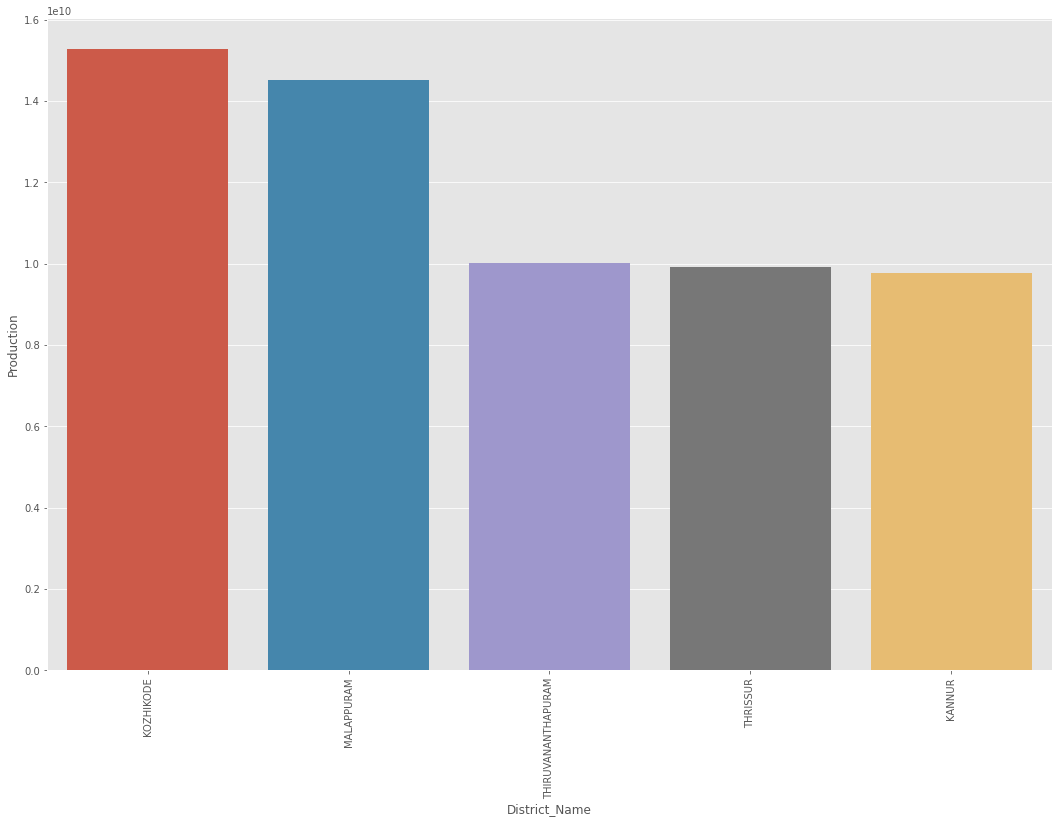

In [59]:
plt.figure(figsize=(18,12))
sns.barplot("District_Name","Production",data=top_coc_pro_dis[:5])
plt.xticks(rotation=90)
plt.show()

C:\Users\prash\anaconda3\envs\py38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


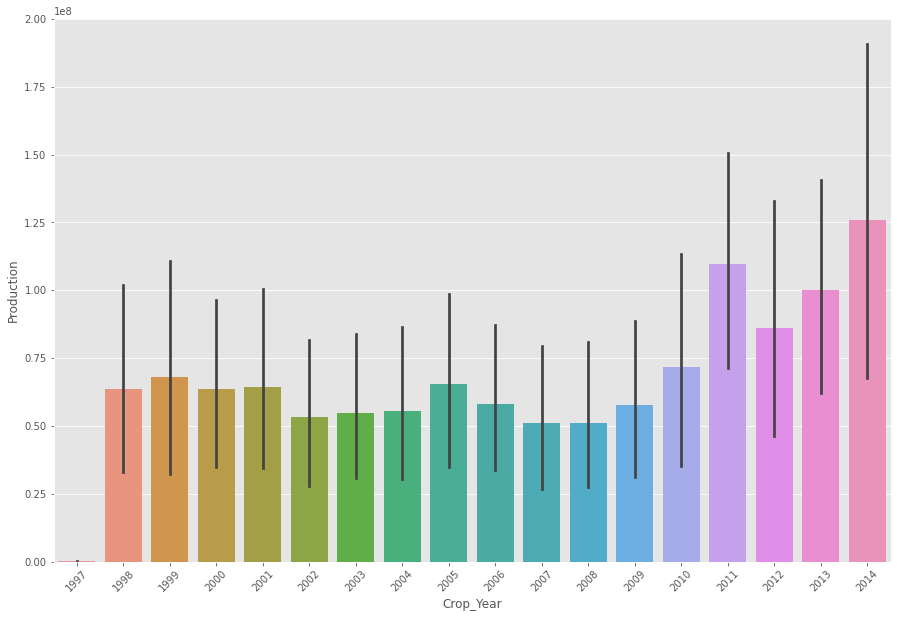

In [60]:
plt.figure(figsize=(15,10))
sns.barplot("Crop_Year","Production",data=coc_df)
plt.xticks(rotation=45)
plt.show()

In [61]:
monthly_total_rainfall = total_rainfall_in_states.head(12)
seasonal_total_rainfall = total_rainfall_in_states.tail(4)

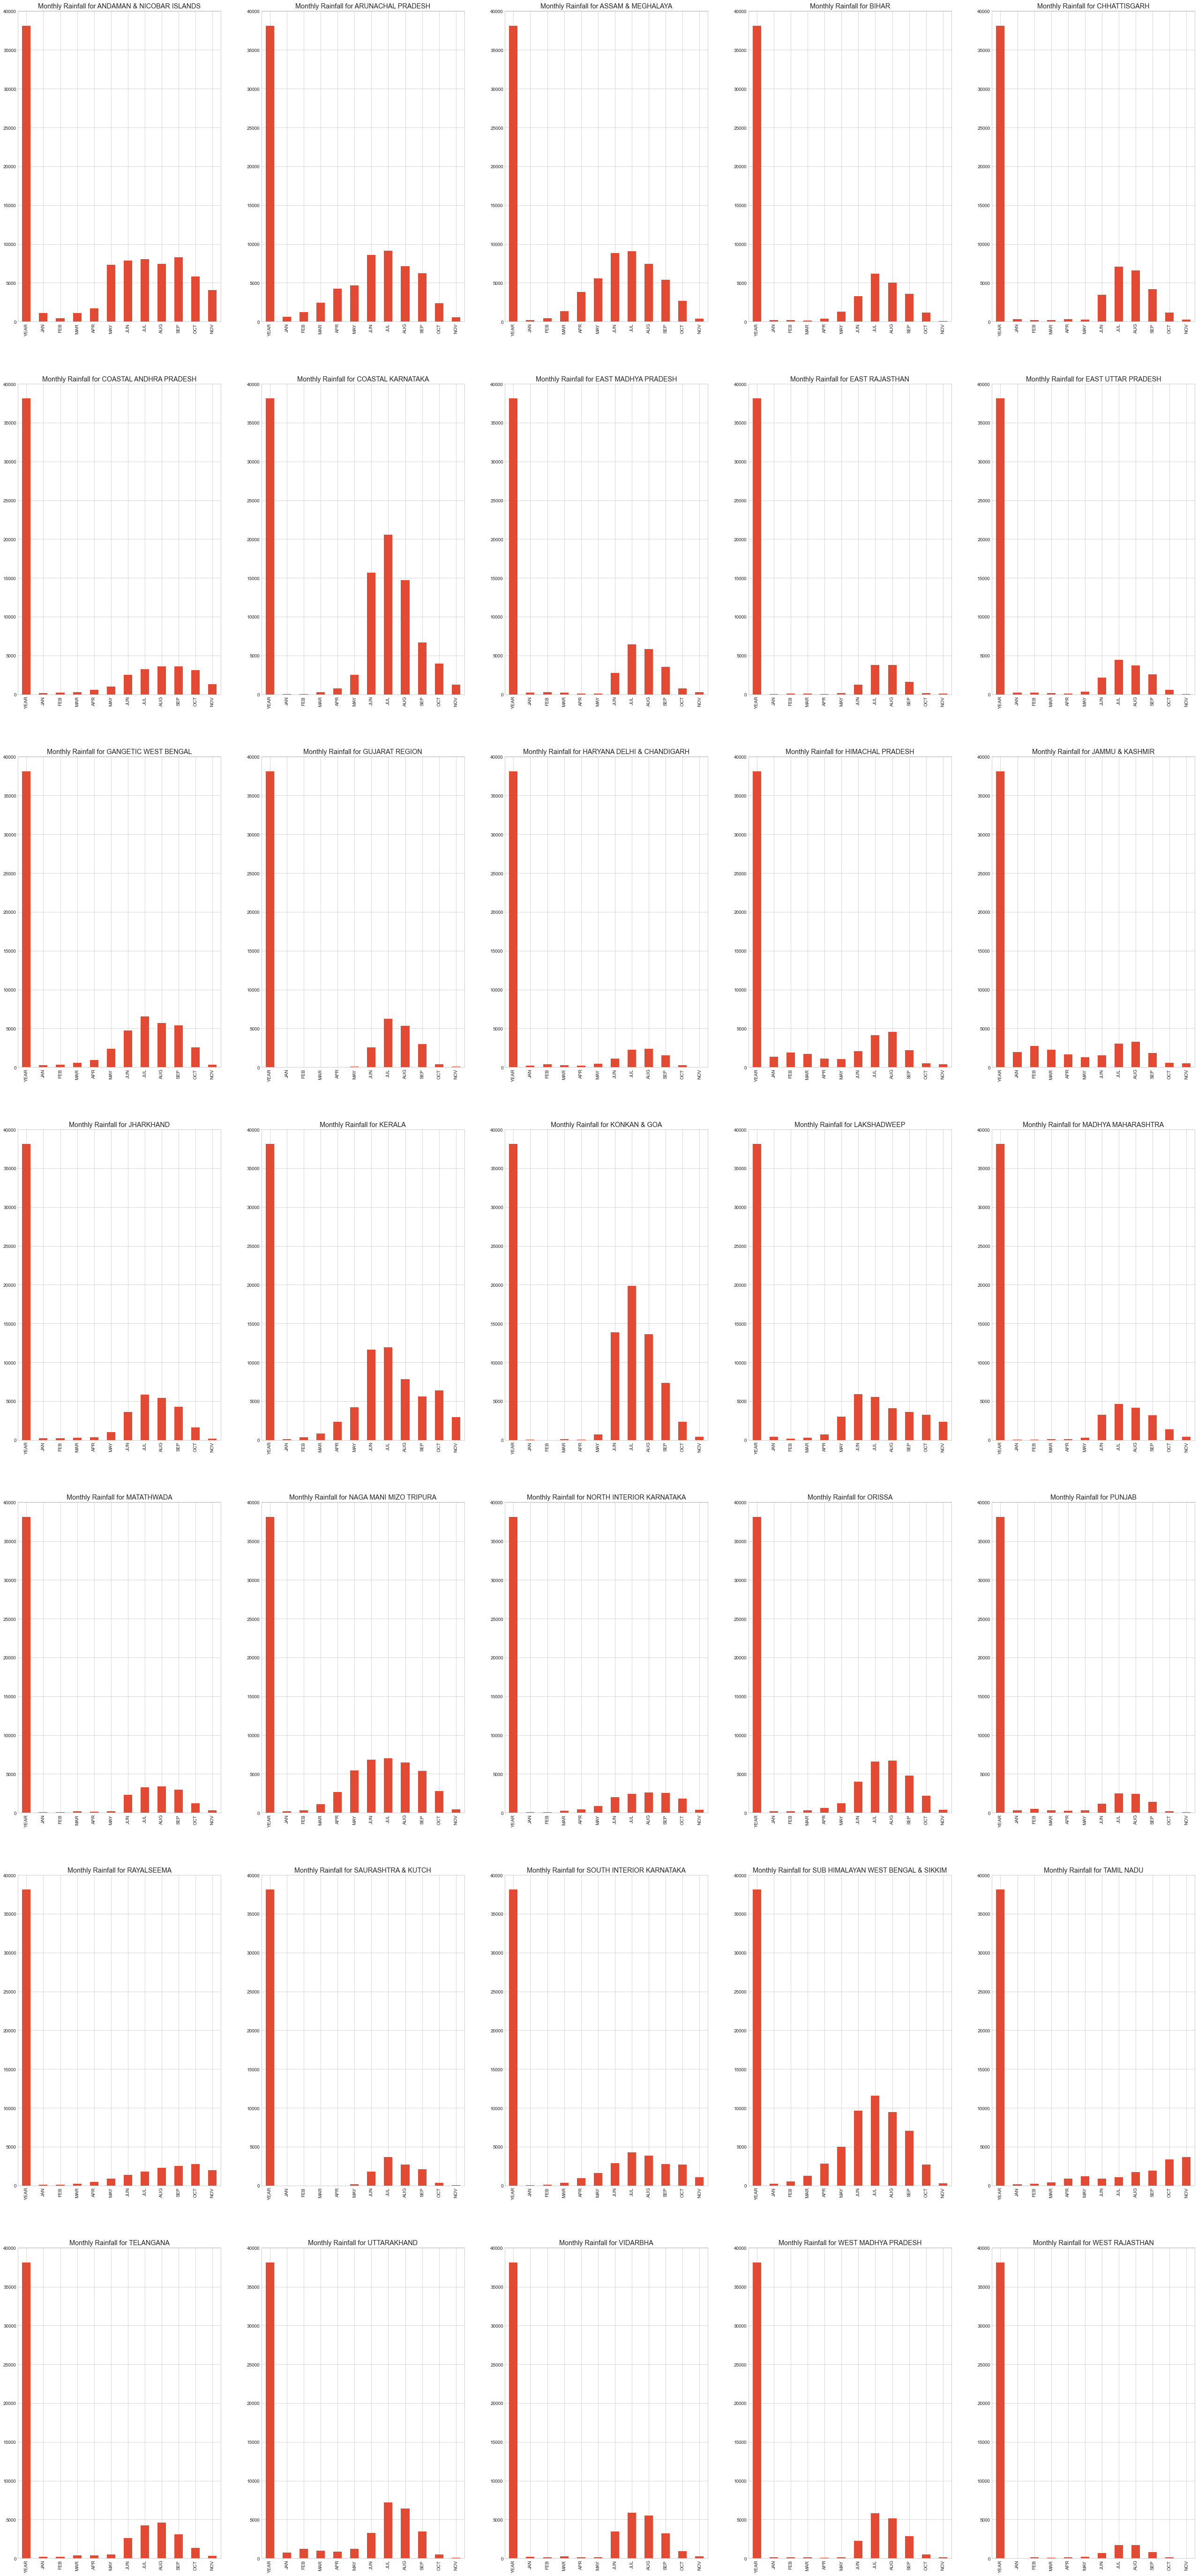

In [62]:
# For each state, visualization of rainfall patterns in different months and season

# A Monthly rainfall

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(45,100))

for i in range(35):
    plt.subplot(7, 5, i+1)
    t = monthly_total_rainfall[monthly_total_rainfall.columns[i]].plot.bar()
    t.set_title("Monthly Rainfall for " + str(monthly_total_rainfall.columns[i]))
plt.show()

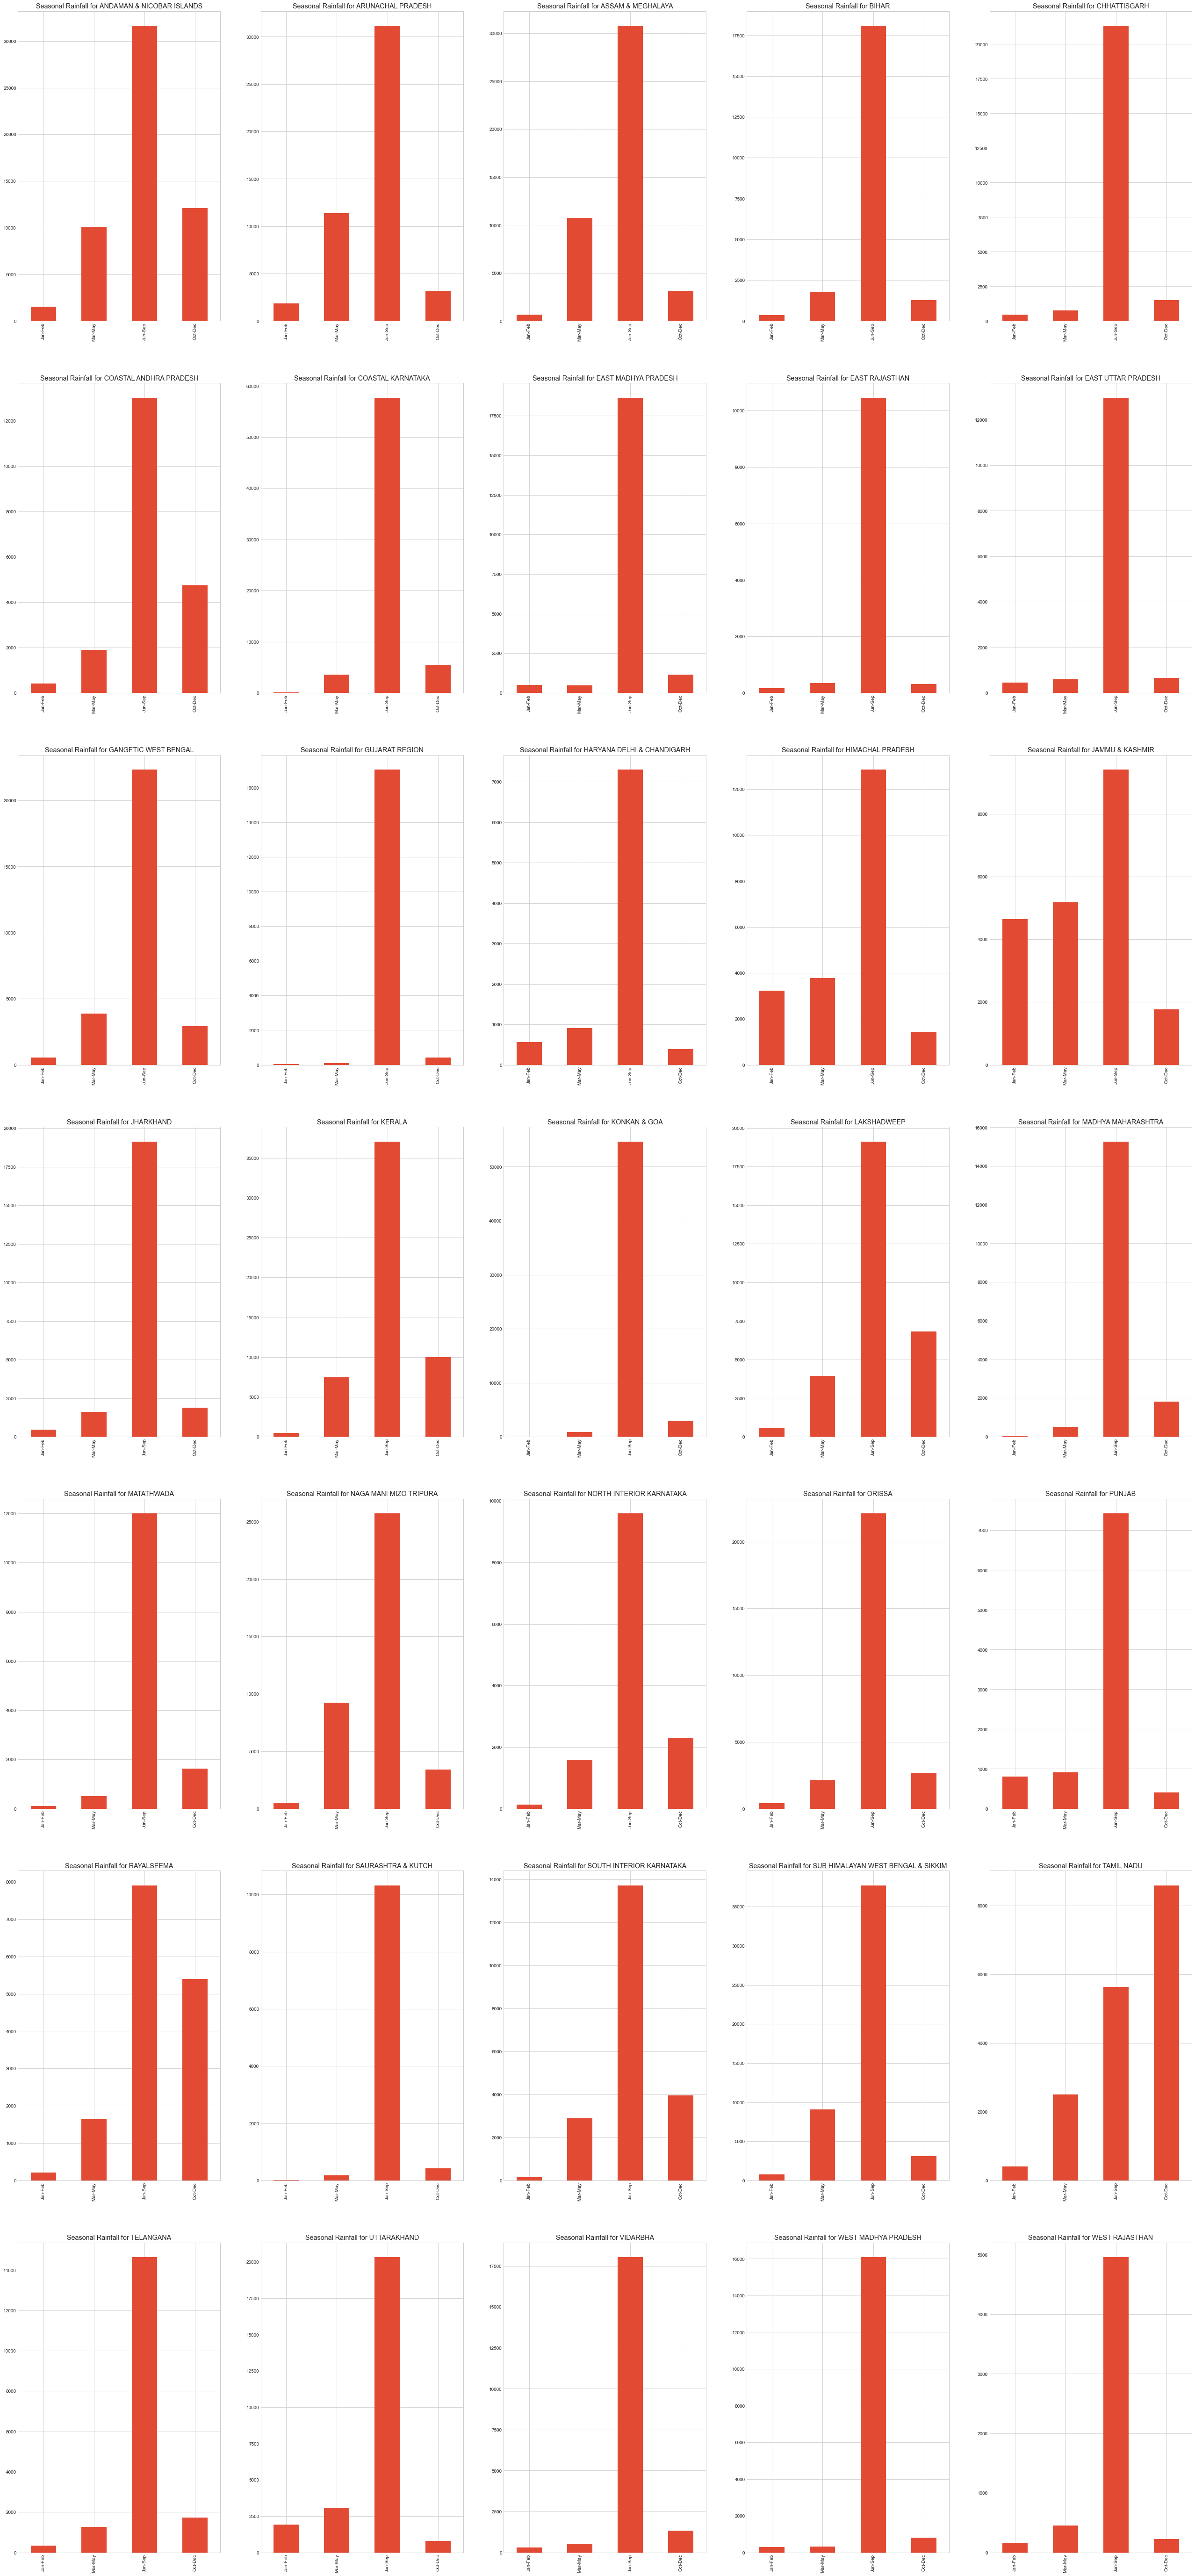

In [63]:
# B Seasonal rainfall

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(45,100))

for i in range(35):
    plt.subplot(7, 5, i+1)
    t = seasonal_total_rainfall[seasonal_total_rainfall.columns[i]].plot.bar()
    t.set_title("Seasonal Rainfall for " +str(seasonal_total_rainfall.columns[i]))
plt.show()

Conclusion Of analysis:

1 Started with 246091 samples wih 7 columns. Production Variable had 3730 (1.5% of total sample size) missing values which was dropped and working dataset has 242361 sample size. Also checked for multicollinearity of variables using heatmap.

2 Univarate Analysis:
-State_Name: 33 Names including Union territories. Top states contributing to dataset are Uttar Pardesh, Madhya Pradesh and Karnataka
-District_Name: 646 districts are represented in the dataset and Top contributors are Tumkur, Belgaum and Bijapur from Karnataka
-Crop_Year: Dataset represents data for 19 years from 1997 to 2015 and maximum data from 2003, 2002 & 2007
-Season: we see six seasons with maximum data from Kharif, Rabi and Whole year
-Crop: we data for 124 different crops with top occurrence from Rice, Maize and Moong(Green Gram)
    
3 Bivarate Analysis:

State_Name Vs Production: Top states are Kerala, Andhara Pradesh and Tamil Nadu
    
4 New Variables created:
    
A. Zones: A new variable was created based on 33 State_Name. States were divided bucketed into North Zone, South Zone, East Zone, West Zone, Central Zone, NE Zone and Union Terr. Dataset has more data coming from South, North and East zones.

B. Cat_crop: 124 crops were divided into Cereal, Pulses, oilseeds, Vegetables, spices, Nuts, Commercial, fibres, Beans, Fruits. Dataset shows top categories are Cereal, Pulses and oilseeds.

a. Zonal distribution of crops:

Production wise top zone is South zone with Kerala topping it's high crop production.

b. Crop wise Production status:

Production wise top crop type are Coconut, Sugarcane and Rice.

c. Yearwise Production Status:

Total Production hit peak in the year 2011 and 2013.

d. Season wise Production Status:

Top crop categories which shows high production values are Whole Year(Annual growing plants),Kharif and Rabi crops. It clearly shows these crops heavily dependent on seasonal monssons.

e. Crop Category wise Production Status:

Top crop categories are Cereal, Pulses and Oilseeds.

f. State versus crop Category versus Season Status:

Top producing state Kerela shows a abundance of whole year seasonal crops and
Top producing state Uttar Pradesh shows abundance of Kharif, Rabi and Summar crops.

g. Different Proportion of crop Categories Status:

Top Crop Categories are Cereal(27.5), Pulses(17.8) and oilseeds(14.7) and these crops contribute towards 60% of total crop production.

5.State dominates in crop production with different categories of crops

Uttar Pradesh is topping in producing more crop categories than any other Indian state and the stats are: Beans(1112), Cereal(9719),Commercial(1741), Fruits(269), Nuts(958), Pulses(6549), Vegetables(3734), Fibres(724), oilseeds(4028) and spices(2529).
    
6.States ranks high in area wise crop production in India

Top cultivating states based on the Cultivation area are: Uttar Pradesh, Madhya Pradesh and Maharashtra

Yearwise Statues of these States:

a. Uttar Pradesh: High Production was seen in 2005 and after that it's been reducing gradually.

b. Madhya Pradesh:1998 showed a high production and then there was gradual reduction but it picked up and 2012 also showed a peak in Production

c. Maharashtra:Production went down drastically in 2006 and again the levels went up and hit a high peak after 2007

d. Rajasthan: the production hit a all time low in the year 2002 and then picked up by 2010

e. West Bengal:the production hit a peak around 2006 but it has hit a low after 2007 and never recovered back.
    
7.Top crops grown in Northern parts of India

Production wise top states of North zone are: Punjab, Uttar Pradesh, and Haryana

Top crops of these states are: Sugarcane, Wheat and Rice

8.Top crop of South India is Coconut,  status of Coconut production in India

Coconut cultivation is yearlong and doesn't get restricted to any particular seasons

Top states involved in coconut production are: Kerala, Andhra Pradesh and Tamil Nadu

Top districts featuring in coconut production is KOZHIKODE(11.75%), MALAPPURAM(11.16%) and THIRUVANANTHAPURAM(7.7%)

Yearwise coconut cultivation is strong and its increasing healthly

9.Annual rainfall in all States and UT

Coastal Karnataka has highest annual rainfall and Western Rajasthan has lowest annual Rainfall

As moving towards south region the annual rainfall percentage increases.

South coastal areas has high amount annual rainfall 

Whereas Middle part of india , North part , Western part has low amount of annual rainfall

Also North eastern parts of india has good amount of annual rainfall compared to north & westerrn part.

10.Total Rainfall Month wise in various states

Intial Months from Jan-April the territory, North part like J&K, Punjab , Himachal pradesh , Uttrakhand has high amount of total rainfall.

In Mid months May-SEP the territory and northern most part also some part of north east has high amount of total rainfall 

While in Extreme months Oct- dec Northern east still has high amount of total rainfall than northern part .

In mid months specially between July - sep southern and coastal part has high total rainfall.

11.Total Rainfall Year wise starting from 1997 -2015

Intially in 90s there is high amount of rainfall which was recorded highest in the year 1998
Between the 2000-2010 there is slight decrease in the rainfall
After 2010 there is more decrease in the amount of total rainfall than 90s period.

12.Monthly wise Rainfall in different states

In intial months every state has low amount of rainfall then northern most part.
July , august , september months in maximum state has high amount of rainfall.
Coastal areas in south western and eastern parts , territories also some part of northern eastern part has highest rainfall compared to other states.

13.Seasonal wise rainfall in different states

In months June- sep seasonal months for rainfall every part of the states has most of rainfall than other seasons
In winter season some parts of the north eastern has still good amount rainfall.
In summer season between March - May most of the northern most part like J&K , Himachal pradesh , uttrakhand has high rainfall.